In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Binarizer, RobustScaler, Normalizer
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\henri\OneDrive\Documentos\EDSA\EDS Bootcamp\Project\Data\HR_DS.csv')

In [3]:
# Remove variables with no variability
non_objs = df.describe().columns.tolist()

noneed=0
list_noneed = []

for col in non_objs:
    if df[col].min() == df[col].max():
        df.drop(columns=[col], inplace=True)
        non_objs.remove(col)
        noneed += 1
        list_noneed.append(col)

if noneed == 1: 
    print('The {0} column was droped'.format(list_noneed))
elif noneed > 1:
    print('{0} columns, {1} were droped'.format(noneed, list_noneed))
else:
    print('No columns were removed.')

2 columns, ['EmployeeCount', 'StandardHours'] were droped


In [4]:
# Remove objects with no variation
objects = df.describe(include='O').columns.tolist()

noneed=0
list_noneed = []

for col in objects:
    if len(df[col].unique()) == 1:
        df.drop(columns=[col], inplace=True)
        objects.remove(col)
        noneed += 1
        list_noneed.append(col)

if noneed == 1: 
    print('The {0} column was droped.'.format(list_noneed))
elif noneed > 1:
    print('{0} columns, {1} were droped.'.format(noneed, list_noneed))
else:
    print('No columns were removed.')

The ['Over18'] column was droped.


In [5]:
patterns = [' ', 'Travel_', '-', '&']
for p in patterns:
    df[objects] = df[objects].apply(lambda x: x.str.replace(p, ''))
    print('Pattern "{}" cleared.'.format(p))

Pattern " " cleared.
Pattern "Travel_" cleared.
Pattern "-" cleared.
Pattern "&" cleared.


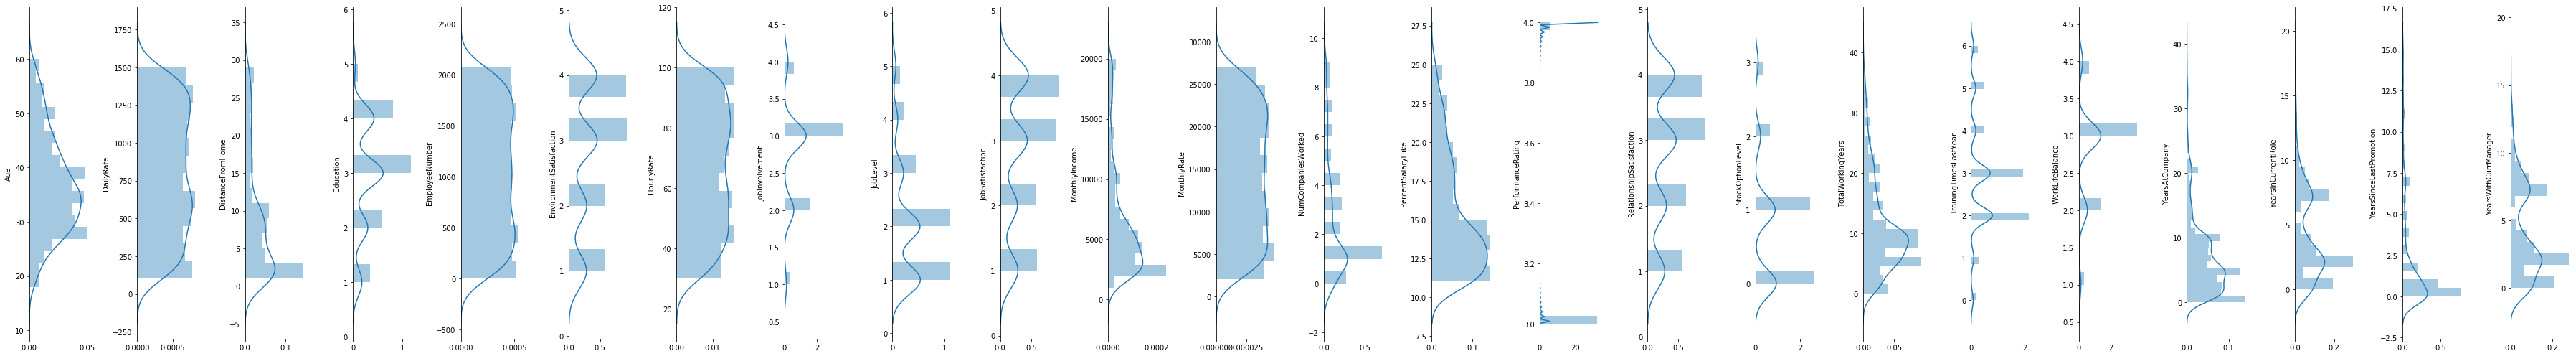

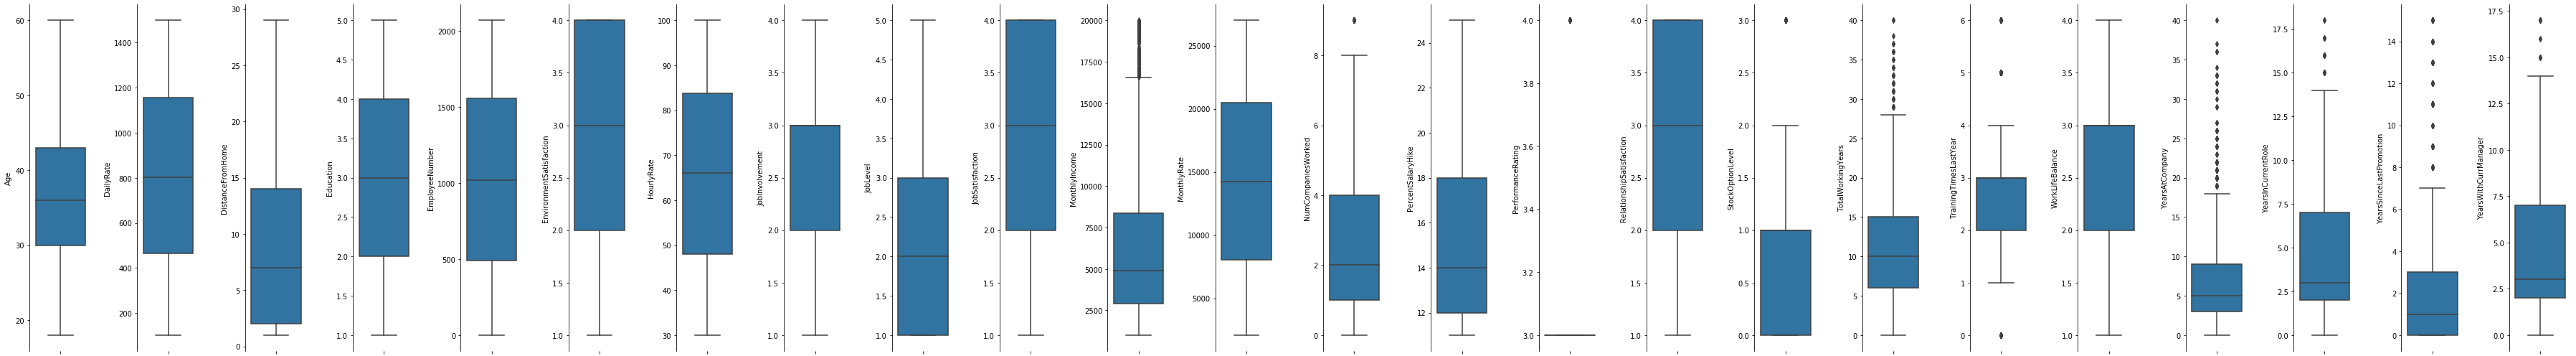

In [6]:
fig, axes = plt.subplots(ncols=len(non_objs), figsize=(50,7))
for ax, col in zip(axes, df[non_objs]):
    sb.distplot(df[col], ax=ax, vertical=True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.tight_layout()
plt.show()

fig, axes = plt.subplots(ncols=len(non_objs), figsize=(50,7))
for ax, col in zip(axes, df[non_objs]):
    sb.boxplot(df[col], ax=ax, orient='v')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.tight_layout()
plt.show()

In [7]:
minmax = MinMaxScaler()
df_pre_ss = pd.concat([df[objects], pd.DataFrame(minmax.fit_transform(df[non_objs]), columns=df[non_objs].columns)], axis=1, sort=False)
df_melted_pre_ss = pd.melt(df_pre_ss, id_vars=objects, value_vars=non_objs, var_name="Var_nonObj", value_name="std_values")

In [8]:
objects

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

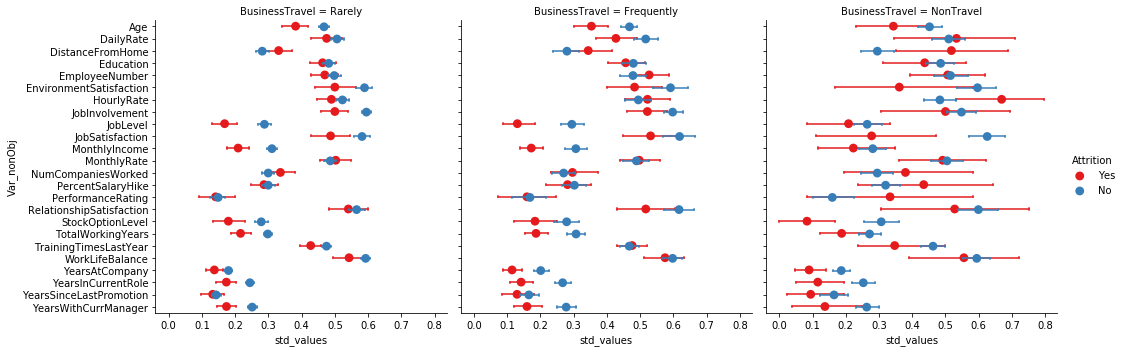

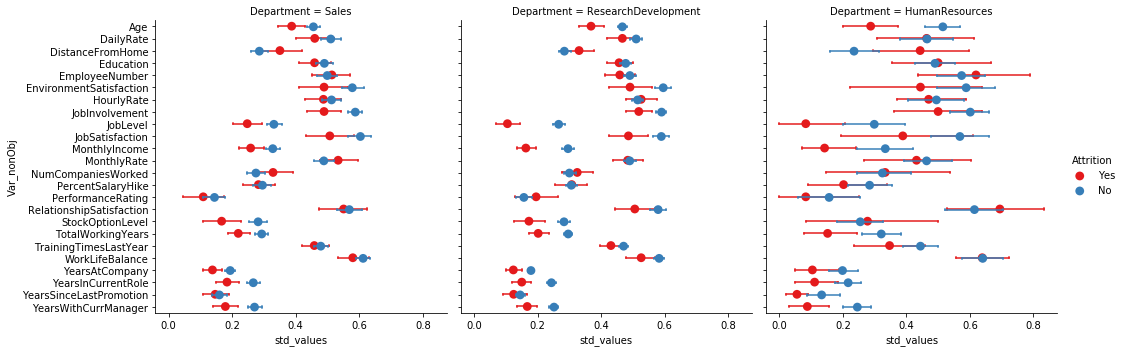

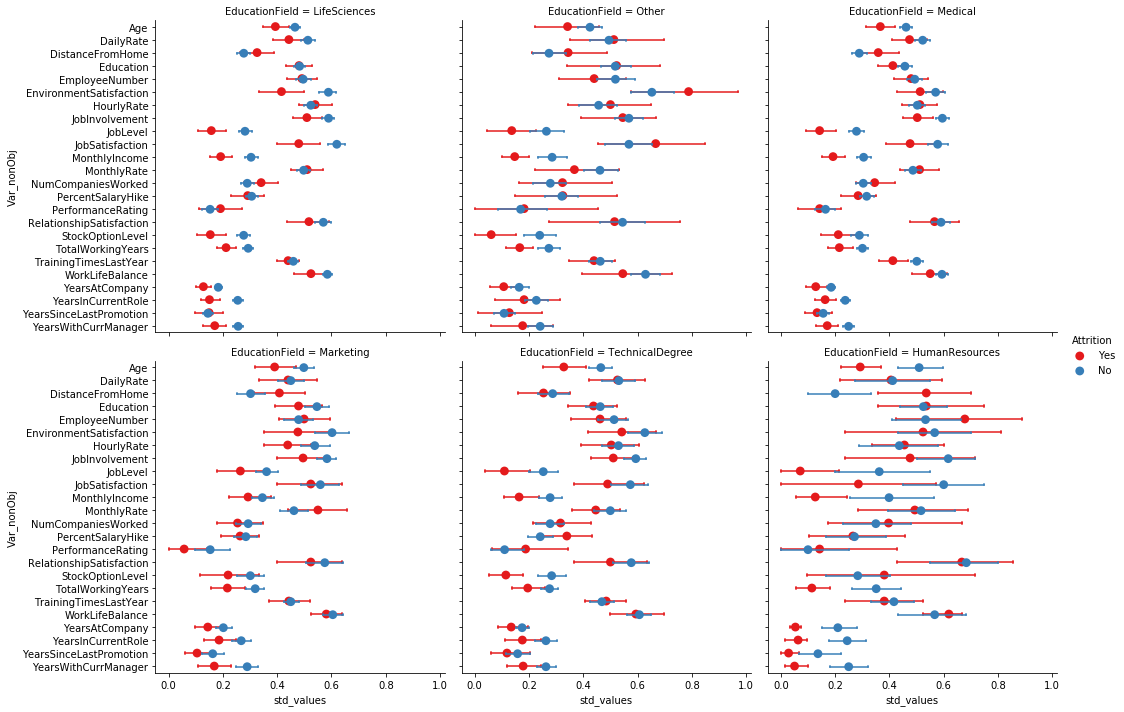

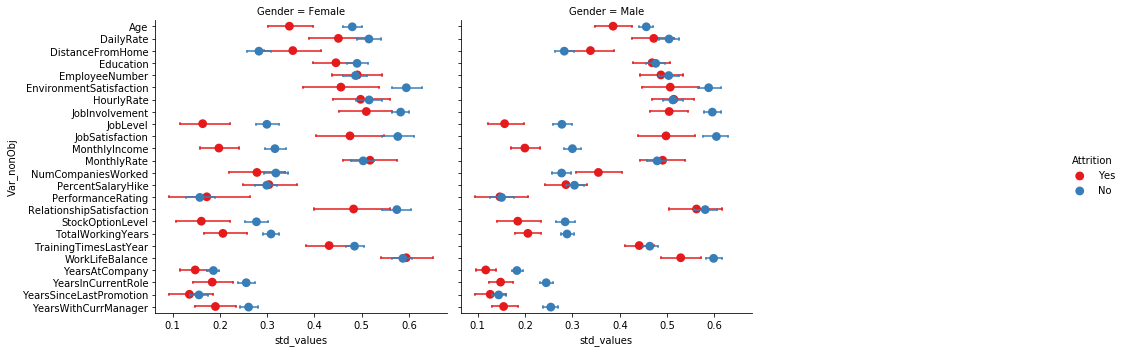

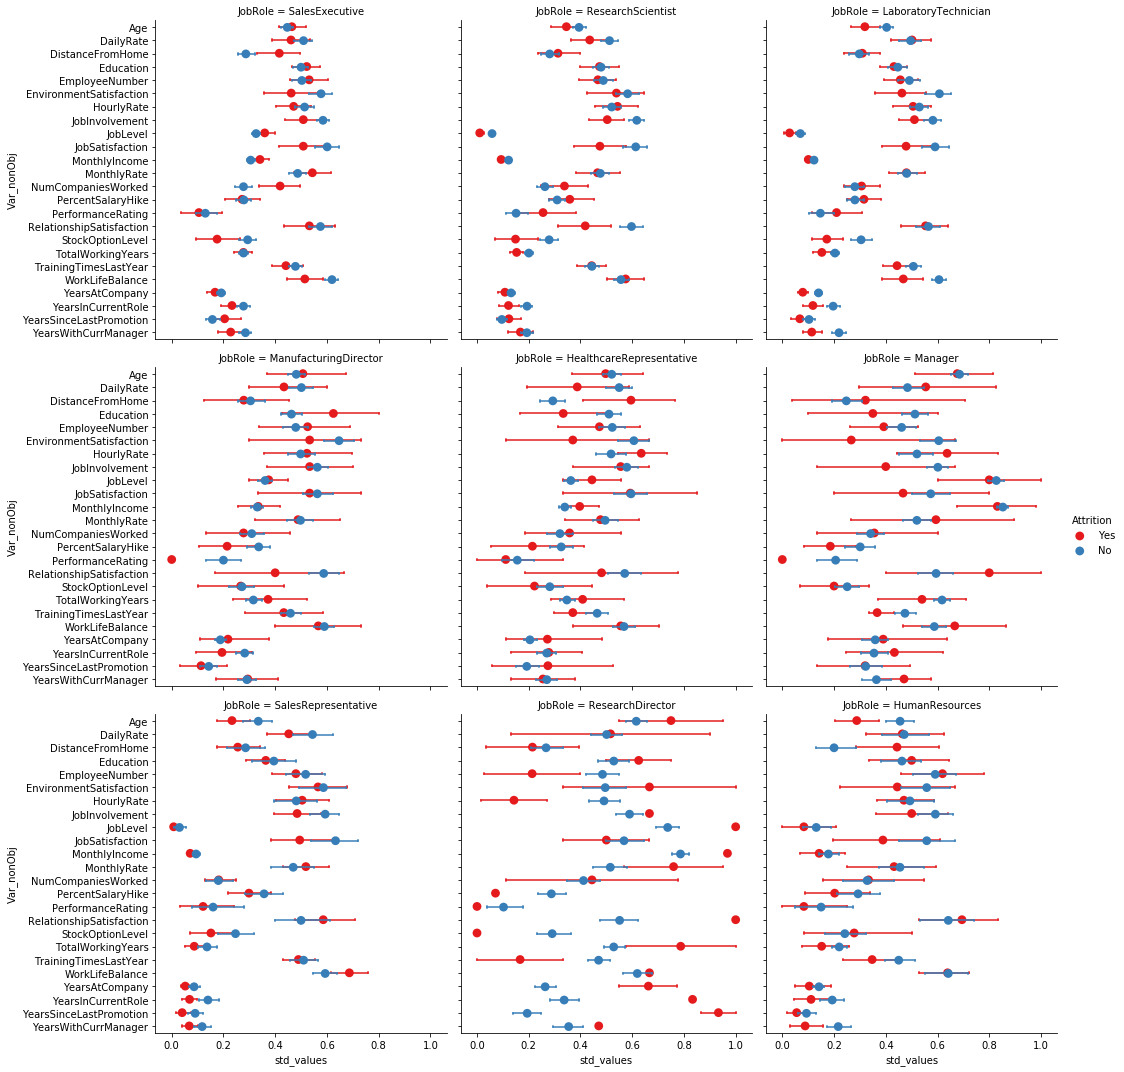

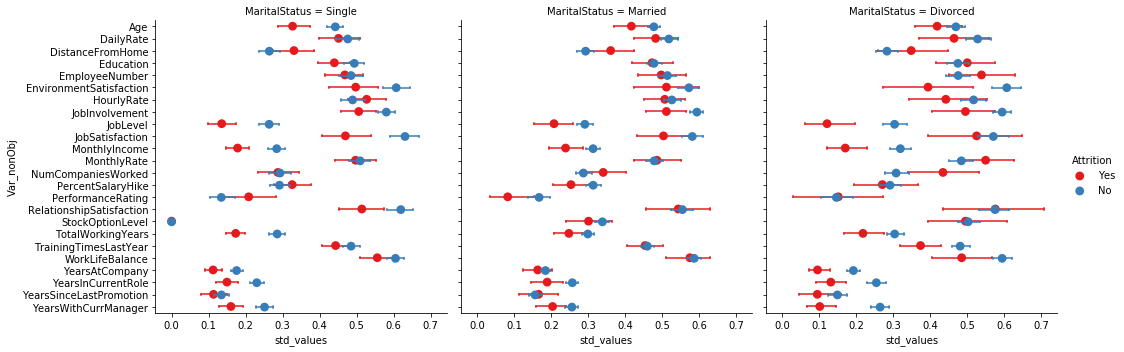

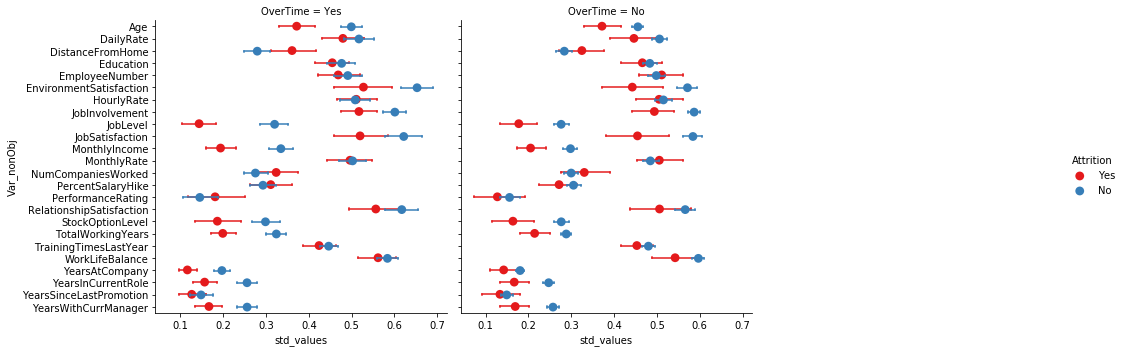

In [9]:
for obj in objects[1:]:
    sb.catplot(x='std_values',
               y='Var_nonObj',
               hue='Attrition',
               data=df_melted_pre_ss, 
               row=None, 
               col=obj, 
               col_wrap=3,
               estimator= np.mean,
               ci=95, 
               n_boot=1000, 
               units=None, 
               order=None, 
               hue_order=None, 
               row_order=None, 
               col_order=None, 
               kind='point', 
               height=5, 
               aspect=1, 
               orient=None, 
               color=None, 
               palette='Set1', 
               legend=True, 
               legend_out=True, 
               sharex=True, 
               sharey=True, 
               margin_titles=True, 
               **{'linestyles':'',
                  'dodge':True,
                  'capsize':0.1,
                  'errwidth':1.5})
    
plt.show()

Making some dummies

In [100]:
df_d = pd.get_dummies(df, drop_first=True)

In [116]:
Norm = MinMaxScaler()

In [117]:
df_d_norm = pd.DataFrame(Norm.fit_transform(df_d), columns=df_d.columns)

In [118]:
df_d_norm.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_NonTravel,BusinessTravel_Rarely,Department_ResearchDevelopment,Department_Sales,EducationField_LifeSciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_TechnicalDegree,Gender_Male,JobRole_HumanResources,JobRole_LaboratoryTechnician,JobRole_Manager,JobRole_ManufacturingDirector,JobRole_ResearchDirector,JobRole_ResearchScientist,JobRole_SalesExecutive,JobRole_SalesRepresentative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.00000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.450567,0.501421,0.292590,0.478231,0.495339,0.573923,0.512731,0.576644,0.265986,0.576190,0.289307,0.490629,0.299244,0.300680,0.153741,0.570748,0.264626,0.28199,0.466553,0.587075,0.175204,0.234958,0.145850,0.242537,0.161224,0.102041,0.709524,0.653741,0.303401,0.412245,0.108163,0.315646,0.055782,0.089796,0.600000,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.457823,0.319728,0.282993
std,0.217509,0.288840,0.289531,0.256041,0.291255,0.364361,0.290420,0.237187,0.276735,0.367615,0.247918,0.285797,0.277557,0.261424,0.360824,0.360403,0.284026,0.19452,0.214878,0.235492,0.153163,0.201285,0.214829,0.209890,0.367863,0.302805,0.454137,0.475939,0.459884,0.492406,0.310692,0.464931,0.229579,0.285986,0.490065,0.184786,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.498387,0.466530,0.450606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.259843,0.035714,0.250000,0.237179,0.333333,0.257143,0.333333,0.000000,0.333333,0.100158,0.239028,0.111111,0.071429,0.000000,0.333333,0.000000,0.15000,0.333333,0.333333,0.075000,0.111111,0.000000,0.117647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.428571,0.501074,0.214286,0.500000,0.493227,0.666667,0.514286,0.666667,0.250000,0.666667,0.205898,0.487513,0.222222,0.214286,0.000000,0.666667,0.333333,0.25000,0.500000,0.666667,0.125000,0.166667,0.066667,0.176471,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.595238,0.755190,0.464286,0.750000,0.752177,1.000000,0.767857,0.666667,0.500000,1.000000,0.388099,0.737503,0.444444,0.500000,0.000000,1.000000,0.333333,0.37500,0.500000,0.666667,0.225000,0.388889,0.200000,0.411765,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000

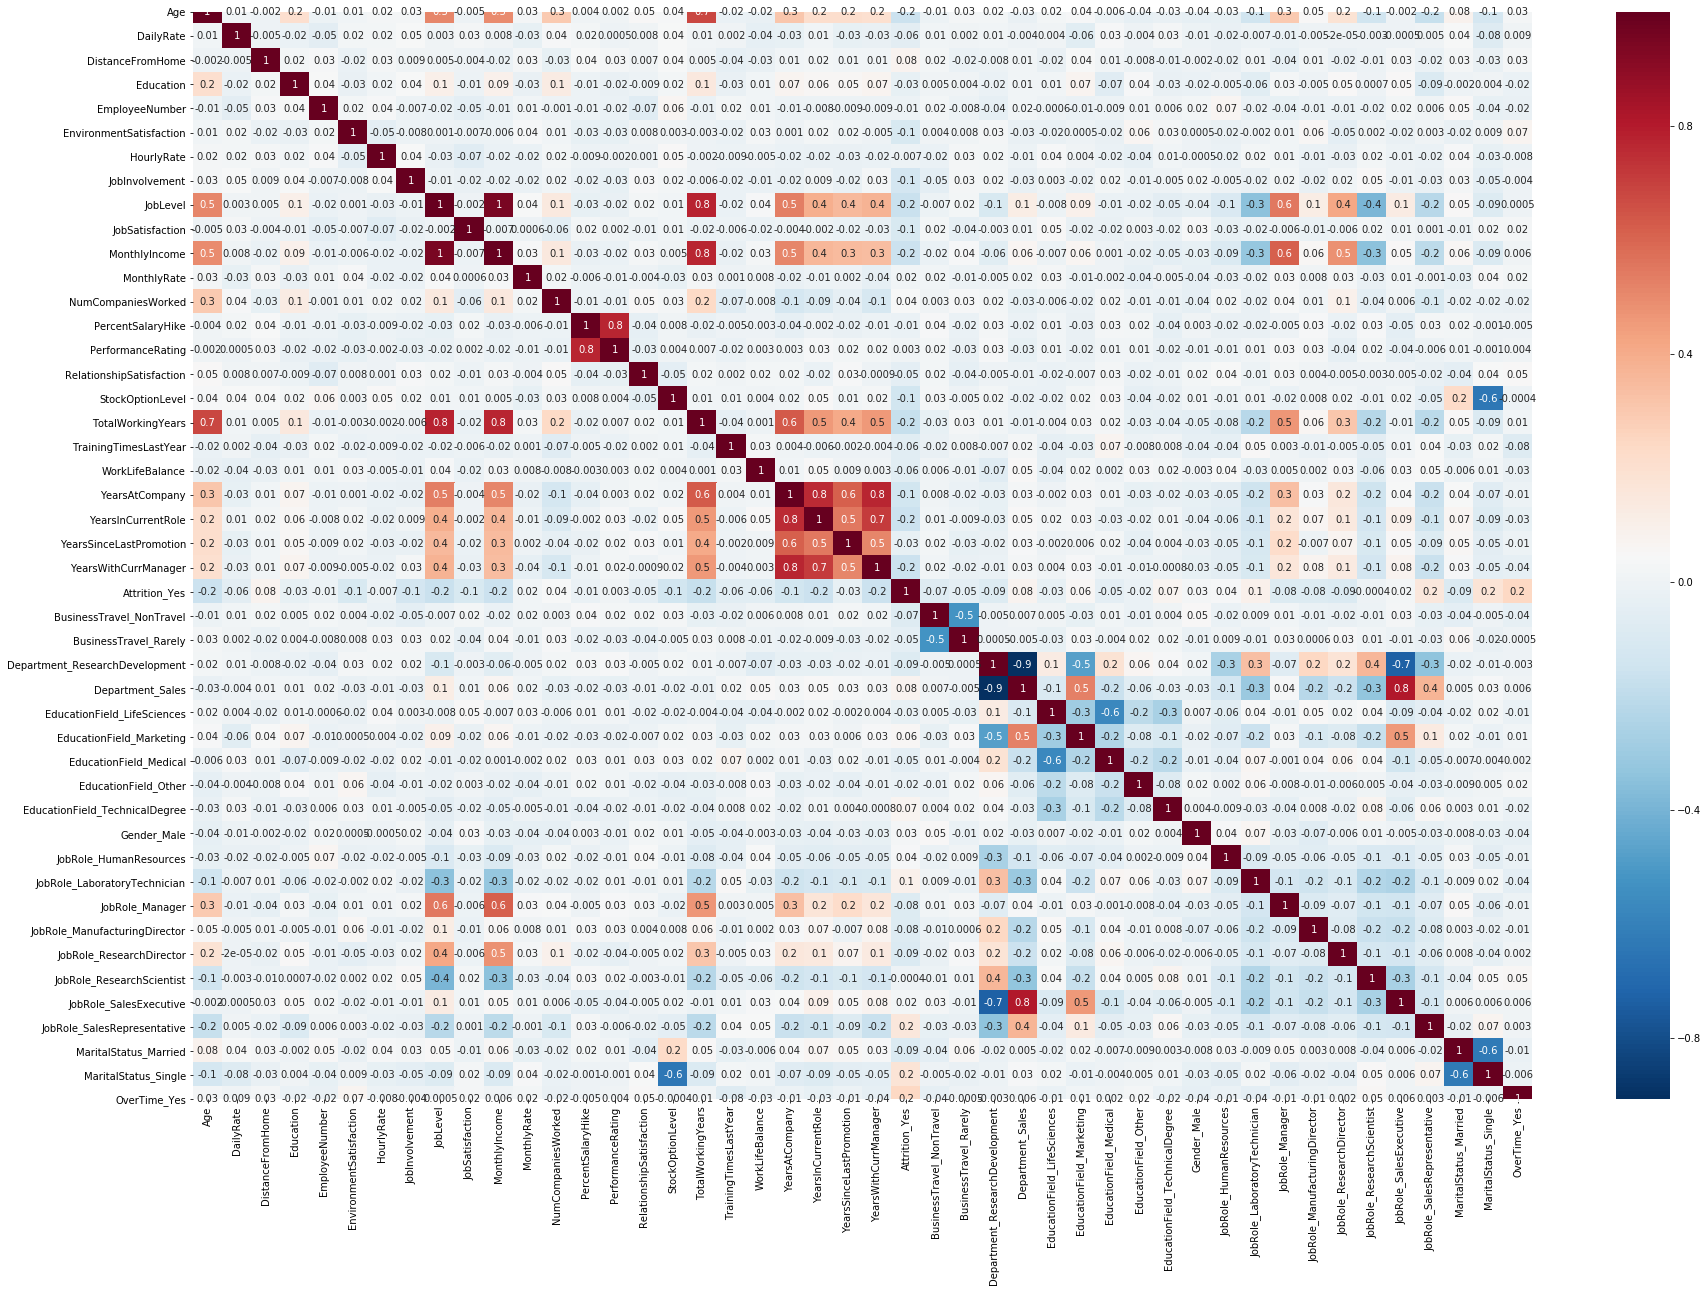

In [119]:
df_d_norm_corr = df_d_norm.corr()
fig = plt.figure(figsize=(30,20))
sb.heatmap(df_d_norm_corr, annot=True, fmt = '.1g', cmap="RdBu_r")
plt.show()

In [13]:
finaldf = pd.get_dummies(df_pre_ss, drop_first=True)

In [60]:
finaldf.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_NonTravel,BusinessTravel_Rarely,Department_ResearchDevelopment,Department_Sales,EducationField_LifeSciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_TechnicalDegree,Gender_Male,JobRole_HumanResources,JobRole_LaboratoryTechnician,JobRole_Manager,JobRole_ManufacturingDirector,JobRole_ResearchDirector,JobRole_ResearchScientist,JobRole_SalesExecutive,JobRole_SalesRepresentative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.00000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.450567,0.501421,0.292590,0.478231,0.495339,0.573923,0.512731,0.576644,0.265986,0.576190,0.289307,0.490629,0.299244,0.300680,0.153741,0.570748,0.264626,0.28199,0.466553,0.587075,0.175204,0.234958,0.145850,0.242537,0.161224,0.102041,0.709524,0.653741,0.303401,0.412245,0.108163,0.315646,0.055782,0.089796,0.600000,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.457823,0.319728,0.282993
std,0.217509,0.288840,0.289531,0.256041,0.291255,0.364361,0.290420,0.237187,0.276735,0.367615,0.247918,0.285797,0.277557,0.261424,0.360824,0.360403,0.284026,0.19452,0.214878,0.235492,0.153163,0.201285,0.214829,0.209890,0.367863,0.302805,0.454137,0.475939,0.459884,0.492406,0.310692,0.464931,0.229579,0.285986,0.490065,0.184786,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.498387,0.466530,0.450606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.259843,0.035714,0.250000,0.237179,0.333333,0.257143,0.333333,0.000000,0.333333,0.100158,0.239028,0.111111,0.071429,0.000000,0.333333,0.000000,0.15000,0.333333,0.333333,0.075000,0.111111,0.000000,0.117647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.428571,0.501074,0.214286,0.500000,0.493227,0.666667,0.514286,0.666667,0.250000,0.666667,0.205898,0.487513,0.222222,0.214286,0.000000,0.666667,0.333333,0.25000,0.500000,0.666667,0.125000,0.166667,0.066667,0.176471,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.595238,0.755190,0.464286,0.750000,0.752177,1.000000,0.767857,0.666667,0.500000,1.000000,0.388099,0.737503,0.444444,0.500000,0.000000,1.000000,0.333333,0.37500,0.500000,0.666667,0.225000,0.388889,0.200000,0.411765,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000

# Models Testing

In [41]:
from sklearn.model_selection import train_test_split

In [46]:
y = finaldf['Attrition_Yes']
X = finaldf.drop(['Attrition_Yes'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

## 1. Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression as LR

In [54]:
model_logistic = LR(class_weight='balanced',
                     random_state=0,
                     solver='liblinear',
                     max_iter=1000,
                     multi_class='ovr',
                     verbose=True,
                     warm_start=True).fit(x_train, y_train)

[LibLinear]

In [55]:
model_logistic.score(x_test, y_test)

0.7391304347826086

### TODO
Fazer mais visualizações como Confusion Matrix

https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

Fazer a divisão do teste, treino e validaçao com bootstrap ou com método de n combinations

## 2. LinearSVC

In [56]:
from sklearn.svm import LinearSVC as LSVC

In [61]:
model_LinearSVC = LSVC(penalty='l2', 
                       loss='squared_hinge', 
                       dual=False, 
                       tol=0.0001, 
                       C=1.0, 
                       multi_class='ovr', 
                       fit_intercept=True, 
                       intercept_scaling=1, 
                       class_weight='balanced', 
                       verbose=1, 
                       random_state=None, 
                       max_iter=10000).fit(x_train, y_train)

[LibLinear]

In [62]:
model_LinearSVC.score(x_test, y_test)

0.7364130434782609